In [ ]:
# data source: https://thecleverprogrammer.com/2023/07/03/credit-scoring-and-segmentation-using-python/

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# pembe uyarilardan kurtulmak icin: 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("credit_scoring.csv")

In [5]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   int64  
 2   Marital Status             1000 non-null   int64  
 3   Education Level            1000 non-null   int64  
 4   Employment Status          1000 non-null   int64  
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 93.9 KB


In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
Gen = {'Male':1 , 'Female': 0}
df['Gender'] = df['Gender'].map(Gen)

In [10]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [11]:
stat = {'Single': 0, 'Married': 1, 'Divorced': 2}
df['Marital Status'] = df['Marital Status'].map(stat) 

In [13]:
df['Education Level'].unique()

array(['Master', 'High School', 'PhD', 'Bachelor'], dtype=object)

In [14]:
edu = {'High School':0, 'Bachelor':1, 'Master':2 , 'PhD':3 }
df['Education Level'] = df['Education Level'].map(edu)

In [16]:
df['Employment Status'].unique()

array(['Employed', 'Unemployed', 'Self-Employed'], dtype=object)

In [18]:
work = {'Unemployed': 0, 'Employed': 1, 'Self-Employed':2}
df['Employment Status']= df['Employment Status'].map(work)

In [20]:
df['Type of Loan'].unique()

array(['Personal Loan', 'Auto Loan', 'Home Loan'], dtype=object)

In [22]:
loan = {'Personal Loan' : 0, 'Auto Loan':1, 'Home Loan':2 }
df['Type of Loan'] = df['Type of Loan'].map(loan)

In [24]:
x = df

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
model = KMeans(8)
model = model.fit(x)

In [47]:
tahmin = model.predict(x)

In [48]:
x['cluster'] = tahmin

In [49]:
x.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,cluster
0,60,1,1,2,1,0.22,2685.0,2,4675000,2.65,48,0,0
1,25,1,1,0,0,0.20,2371.0,9,3619000,5.19,60,1,2
2,30,0,0,2,1,0.22,2771.0,6,957000,2.76,12,1,3
3,58,0,1,3,0,0.12,1371.0,2,4731000,6.57,60,1,0
4,32,1,1,1,2,0.99,828.0,2,3289000,6.28,36,0,2


In [53]:
x['cluster'].value_counts()

1    151
4    134
2    131
7    126
5    125
0    122
6    109
3    102
Name: cluster, dtype: int64

In [51]:
silhouette_score(x,tahmin)

0.5512640895977645

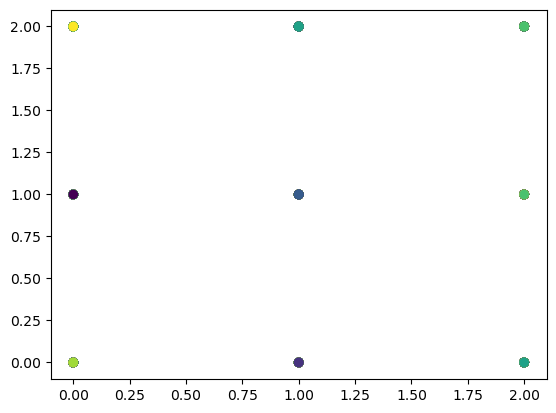

In [52]:
plt.figure()
#plt.scatter(x["Employment Status"], x["Loan Amount"], c = tahmin)
plt.scatter(x["Employment Status"], x["Type of Loan"], c = tahmin)




In [41]:
allscore= []
allclusters = []
distances = []
def clust(kactane):
    for i in range(1,kactane):
        i = i+1
        model   = KMeans(i)
        model   = model.fit(x)
        tahmin  = model.predict(x)
        score   = silhouette_score(x,tahmin)
        distance = model.inertia_
        print('cluster ',i," score: ", score)
        allscore.append(score) 
        allclusters.append(i)
        distances.append(distance)

In [42]:
clust(10)

cluster  2  score:  0.6169395167347729
cluster  3  score:  0.5887763857019145
cluster  4  score:  0.5736131511150423
cluster  5  score:  0.5692235542553525
cluster  6  score:  0.5598538050331456
cluster  7  score:  0.5562955617118955
cluster  8  score:  0.5513736594609842
cluster  9  score:  0.5459068890692329
cluster  10  score:  0.5540138291545077


In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_data = linkage(x, method = "ward", metric = "euclidean")

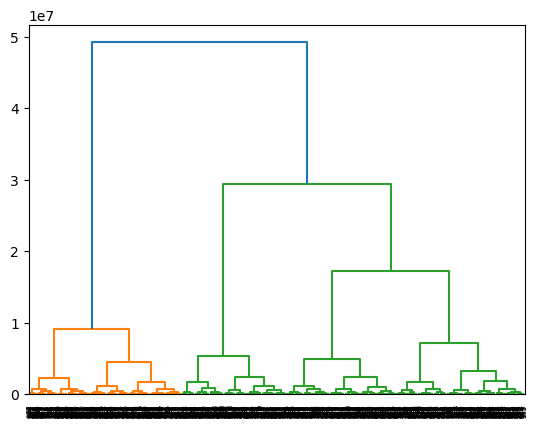

In [44]:
dendrogram(link_data)
plt.show()